# NAME: ARGHYADEEP HAZRA
## Position: Data Science Intern
### Project: Market Basket Analysis in Python using Apriori Algorithm

# Importing needed libraries

In [78]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import networkx as nx
import matplotlib.pyplot as plt  

# Importing dataset into dataframe

In [43]:
df_data = pd.read_csv('data.csv', encoding="ISO-8859-1")
df_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

# Data Preprocessing

In [44]:
#Checking column names of dataframe
df_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [87]:
print(f"This dataframe has: \nrows:{df_data.shape[0]}  \ncolumns:{df_data.shape[1]}")

This dataframe has: 
rows:541909  
columns:8


In [88]:
print(f"The Total Null values in each columns by percentage wise are:\n{df_data.isnull().sum()}")

The Total Null values in each columns by percentage wise are:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [90]:
print(f"The Total Null values in each columns by percentage wise are:\n{(df_data.isnull().sum()/df_data.shape[0])*100}")

The Total Null values in each columns by percentage wise are:
InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


In [45]:
df_data.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [46]:
#Selecting France's data for now 
df_country = df_data[df_data.Country == 'France']
# removing spaces
df_country['Description'] = df_country['Description'].str.strip()


C:\Users\KIIT\AppData\Local\Temp\ipykernel_584\1885417826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['Description'] = df_country['Description'].str.strip()


In [47]:
#removing negative values
df_country = df_country[df_data.Quantity >0]

C:\Users\KIIT\AppData\Local\Temp\ipykernel_584\3121155413.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_country = df_country[df_data.Quantity >0]


In [48]:
df_country[df_country.Country == 'France']

InvoiceNo StockCode                      Description  Quantity  \
26        536370     22728        ALARM CLOCK BAKELIKE PINK        24   
27        536370     22727         ALARM CLOCK BAKELIKE RED        24   
28        536370     22726       ALARM CLOCK BAKELIKE GREEN        12   
29        536370     21724  PANDA AND BUNNIES STICKER SHEET        12   
30        536370     21883                  STARS GIFT TAPE        24   
...          ...       ...                              ...       ...   
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899      CHILDREN'S APRON DOLLY GIRL         6   
541906    581587     23254     CHILDRENS CUTLERY DOLLY GIRL         4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138     BAKING SET 9 PIECE RETROSPOT         3   

            InvoiceDate  UnitPrice  CustomerID Country  
26       12/1/2010 8:45       3.75     12583.0  France  
27       12/1/2010 8:45       3.75     12583.0  France  
28       12/1/2010 8:45       3.75     12583.0  France  
29       12/1/2010 8:45       0.85     12583.0  France  
30       12/1/2010 8:45       0.65     12583.0  France  
...                 ...        ...         ...     ...  
541904  12/9/2011 12:50       0.85     12680.0  France  
541905  12/9/2011 12:50       2.10     12680.0  France  
541906  12/9/2011 12:50       4.15     12680.0  France  
541907  12/9/2011 12:50       4.15     12680.0  France  
541908  12/9/2011 12:50       4.95     12680.0  France  

[8408 rows x 8 columns]

In [49]:
#convert data in format which it require converting using pivot table and Quantity sum as values. 
#Replace nan with 0

basket = pd.pivot_table(data=df_country,index='InvoiceNo',columns='Description',values='Quantity',aggfunc='sum',fill_value=0)

In [50]:
basket

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536370                            0                           0   
536852                            0                           0   
536974                            0                           0   
537065                            0                           0   
537463                            0                           0   
...                             ...                         ...   
580986                            0                           0   
581001                            0                           0   
581171                            0                           0   
581279                            0                           0   
581587                            0                           0   

Description  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
InvoiceNo                                                                 
536370                               0                                0   
536852                               0                                0   
536974                               0                                0   
537065                               0                                0   
537463                               0                                0   
...                                ...                              ...   
580986                               0                                0   
581001                               0                                0   
581171                               0                                0   
581279                               0                                0   
581587                               0                                0   

Description  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                    
536370                                   0   
536852                                   0   
536974                                   0   
537065                                   0   
537463                                   0   
...                                    ...   
580986                                   0   
581001                                   0   
581171                                   0   
581279                                   0   
581587                                   0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536370                                         0                            0   
536852                                         0                            0   
536974                                         0                            0   
537065                                         0                            0   
537463                                         0                            0   
...                                          ...                          ...   
580986                                         0                            0   
581001                                         0                            0   
581171                                         0                            0   
581279                                         0                            0   
581587                                         0                            0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
InvoiceNo                                                                    
536370                               0                                   0   
536852                               0                                   0   
536974                               0                                   0   
537065                               0                                   0   
537463                         

In [51]:
#describing basket
basket.describe()

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
count                    392.000000                  392.000000   
mean                       0.857143                    0.306122   
std                        5.077406                    2.458487   
min                        0.000000                    0.000000   
25%                        0.000000                    0.000000   
50%                        0.000000                    0.000000   
75%                        0.000000                    0.000000   
max                       48.000000                   20.000000   

Description  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
count                       392.000000                       392.000000   
mean                          0.005102                         0.061224   
std                           0.101015                         0.856046   
min                           0.000000                         0.000000   
25%                           0.000000                         0.000000   
50%                           0.000000                         0.000000   
75%                           0.000000                         0.000000   
max                           2.000000                        12.000000   

Description  12 PENCIL SMALL TUBE WOODLAND  \
count                           392.000000   
mean                              0.502551   
std                               5.410513   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              96.000000   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
count                                 392.000000                   392.000000   
mean                                    0.380102                     0.395408   
std                                     2.959386                     3.432846   
min                                     0.000000                     0.000000   
25%                                     0.000000                     0.000000   
50%                                     0.000000                     0.000000   
75%                                     0.000000                     0.000000   
max                                    24.000000                    48.000000   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
count                       392.000000                          392.000000   
mean                          0.061224                            0.278061   
std                           1.212183                            1.994039   
min                           0.000000                            0.000000   
25%                           0.000000                            0.000000   
50%                           0.000000                            0.000000   
75%                           0.000000                            0.000000   
max                          24.000000                           24.000000   

Description  12 PENCILS TALL TUBE WOODLAND  ...  WRAP VINTAGE PETALS  DESIGN  \
count                           392.000000  ...                   392.000000   
mean                              0.183673  ...                     0.191327   
std                               1.475092  ...                     2.181444   
min                               0.000000  ...                     0.000000   
25%                               0.000000  ...                     0.000000   
50%                               0.000000  ...                     0.000000   
75%                               0.000000  ...                     0.000000   
max                              12.000000  ...                    25.000000   

Description  YELLOW COAT RACK PARIS FASHION  YELLOW GIANT GARDEN THERMOMETER  \
count                            392.000000                       392.0

In [52]:
#this to check correctness after binning it to 1 at below code..
basket['ALARM CLOCK BAKELIKE PINK']

InvoiceNo
536370    24
536852     0
536974     0
537065     4
537463     0
          ..
580986     0
581001    18
581171     0
581279     0
581587     4
Name: ALARM CLOCK BAKELIKE PINK, Length: 392, dtype: int64

In [53]:
# If user has taken that item mark as 1 else he has not taken 0.
def binary_converter(x):
    if x > 0:
        return 1
    else:
        return 0

In [55]:
basket_sets = basket.applymap(binary_converter)

In [56]:
# above steps we can same item has quantity now converted to 1 or 0.
basket_sets['ALARM CLOCK BAKELIKE PINK'].head()

InvoiceNo
536370    1
536852    0
536974    0
537065    1
537463    0
Name: ALARM CLOCK BAKELIKE PINK, dtype: int64

In [57]:
#remove postage item as it is just a seal which almost all transaction contain. 
basket_sets.drop(columns=['POSTAGE'],inplace=True)

In [58]:
#call apriori function and pass minimum support here we are passing 7%. means 7 times in
#total number of transaction that item was present.
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

C:\Users\KIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [59]:
#It will generate frequent itemsets using two step approch
frequent_itemsets

support                                           itemsets
0   0.071429                      (4 TRADITIONAL SPINNING TOPS)
1   0.096939                       (ALARM CLOCK BAKELIKE GREEN)
2   0.102041                        (ALARM CLOCK BAKELIKE PINK)
3   0.094388                         (ALARM CLOCK BAKELIKE RED)
4   0.081633                     (BAKING SET 9 PIECE RETROSPOT)
5   0.071429                     (CHILDRENS CUTLERY DOLLY GIRL)
6   0.099490                             (DOLLY GIRL LUNCH BOX)
7   0.096939                          (JUMBO BAG RED RETROSPOT)
8   0.076531                       (JUMBO BAG WOODLAND ANIMALS)
9   0.125000                           (LUNCH BAG APPLE DESIGN)
10  0.084184                      (LUNCH BAG DOLLY GIRL DESIGN)
11  0.153061                          (LUNCH BAG RED RETROSPOT)
12  0.119898                        (LUNCH BAG SPACEBOY DESIGN)
13  0.117347                               (LUNCH BAG WOODLAND)
14  0.142857                 (LUNCH BOX WITH CUTLERY RETROSPOT)
15  0.104592                           (MINI PAINT SET VINTAGE)
16  0.102041                  (PACK OF 72 RETROSPOT CAKE CASES)
17  0.081633                          (PAPER BUNTING RETROSPOT)
18  0.168367                    (PLASTERS IN TIN CIRCUS PARADE)
19  0.137755                         (PLASTERS IN TIN SPACEBOY)
20  0.081633                        (PLASTERS IN TIN STRONGMAN)
21  0.170918                 (PLASTERS IN TIN WOODLAND ANIMALS)
22  0.188776                               (RABBIT NIGHT LIGHT)
23  0.096939                      (RED RETROSPOT CHARLOTTE BAG)
24  0.137755                         (RED RETROSPOT MINI CASES)
25  0.071429                         (RED RETROSPOT PICNIC BAG)
26  0.181122                    (RED TOADSTOOL LED NIGHT LIGHT)
27  0.125000                         (REGENCY CAKESTAND 3 TIER)
28  0.086735                  (RETROSPOT TEA SET CERAMIC 11 PC)
29  0.107143                (ROUND SNACK BOXES SET OF 4 FRUITS)
30  0.158163               (ROUND SNACK BOXES SET OF4 WOODLAND)
31  0.076531                (SET/10 RED POLKADOT PARTY CANDLES)
32  0.132653               (SET/20 RED RETROSPOT PAPER NAPKINS)
33  0.137755                      (SET/6 RED SPOTTY PAPER CUPS)
34  0.127551                    (SET/6 RED SPOTTY PAPER PLATES)
35  0.071429                           (SPACEBOY BIRTHDAY CARD)
36  0.125000                               (SPACEBOY LUNCH BOX)
37  0.122449                (STRAWBERRY LUNCH BOX WITH CUTLERY)
38  0.094388                          (TEA PARTY BIRTHDAY CARD)
39  0.073980                           (WOODLAND CHARLOTTE BAG)
40  0.073980  (ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...
41  0.079082  (ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL...
42  0.073980  (ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI...
43  0.071429         (SPACEBOY LUNCH BOX, DOLLY GIRL LUNCH BOX)
44  0.089286  (PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TI...
45  0.102041  (PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TI...
46  0.104592  (PLASTERS IN TIN WOODLAND ANIMALS, PLASTERS IN...
47  0.102041  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...
48  0.102041  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...
49  0.122449  (SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...
50  0.099490  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...

In [60]:
# we have association rules which need to put on frequent itemset. here we are setting based on
#lift and has minimum lift as 1
rules_mlxtend = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_mlxtend.head()

antecedents                   consequents  \
0   (ALARM CLOCK BAKELIKE PINK)  (ALARM CLOCK BAKELIKE GREEN)   
1  (ALARM CLOCK BAKELIKE GREEN)   (ALARM CLOCK BAKELIKE PINK)   
2  (ALARM CLOCK BAKELIKE GREEN)    (ALARM CLOCK BAKELIKE RED)   
3    (ALARM CLOCK BAKELIKE RED)  (ALARM CLOCK BAKELIKE GREEN)   
4   (ALARM CLOCK BAKELIKE PINK)    (ALARM CLOCK BAKELIKE RED)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.102041            0.096939  0.073980    0.725000  7.478947   
1            0.096939            0.102041  0.073980    0.763158  7.478947   
2            0.096939            0.094388  0.079082    0.815789  8.642959   
3            0.094388            0.096939  0.079082    0.837838  8.642959   
4            0.102041            0.094388  0.073980    0.725000  7.681081   

   leverage  conviction  zhangs_metric  
0  0.064088    3.283859       0.964734  
1  0.064088    3.791383       0.959283  
2  0.069932    4.916181       0.979224  
3  0.069932    5.568878       0.976465  
4  0.064348    3.293135       0.968652

In [61]:
# rules_mlxtend.rename(columns={'antecedents':'lhs','consequents':'rhs'})
# as based business use case we can sort based on confidance and lift.
rules_mlxtend[ (rules_mlxtend['lift'] >= 4) & (rules_mlxtend['confidence'] >= 0.8) ]

antecedents  \
2                        (ALARM CLOCK BAKELIKE GREEN)   
3                          (ALARM CLOCK BAKELIKE RED)   
17                    (SET/6 RED SPOTTY PAPER PLATES)   
18                      (SET/6 RED SPOTTY PAPER CUPS)   
19                    (SET/6 RED SPOTTY PAPER PLATES)   
20  (SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...   
21  (SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...   
22  (SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...   

                             consequents  antecedent support  \
2             (ALARM CLOCK BAKELIKE RED)            0.096939   
3           (ALARM CLOCK BAKELIKE GREEN)            0.094388   
17  (SET/20 RED RETROSPOT PAPER NAPKINS)            0.127551   
18       (SET/6 RED SPOTTY PAPER PLATES)            0.137755   
19         (SET/6 RED SPOTTY PAPER CUPS)            0.127551   
20       (SET/6 RED SPOTTY PAPER PLATES)            0.102041   
21         (SET/6 RED SPOTTY PAPER CUPS)            0.102041   
22  (SET/20 RED RETROSPOT PAPER NAPKINS)            0.122449   

    consequent support   support  confidence      lift  leverage  conviction  \
2             0.094388  0.079082    0.815789  8.642959  0.069932    4.916181   
3             0.096939  0.079082    0.837838  8.642959  0.069932    5.568878   
17            0.132653  0.102041    0.800000  6.030769  0.085121    4.336735   
18            0.127551  0.122449    0.888889  6.968889  0.104878    7.852041   
19            0.137755  0.122449    0.960000  6.968889  0.104878   21.556122   
20            0.127551  0.099490    0.975000  7.644000  0.086474   34.897959   
21            0.137755  0.099490    0.975000  7.077778  0.085433   34.489796   
22            0.132653  0.099490    0.812500  6.125000  0.083247    4.625850   

    zhangs_metric  
2        0.979224  
3        0.976465  
17       0.956140  
18       0.993343  
19       0.981725  
20       0.967949  
21       0.956294  
22       0.953488

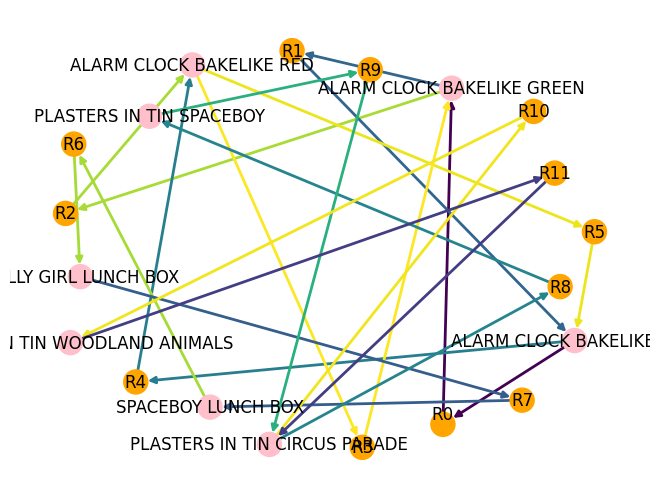

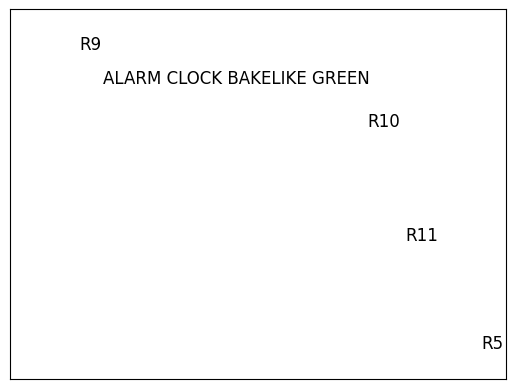

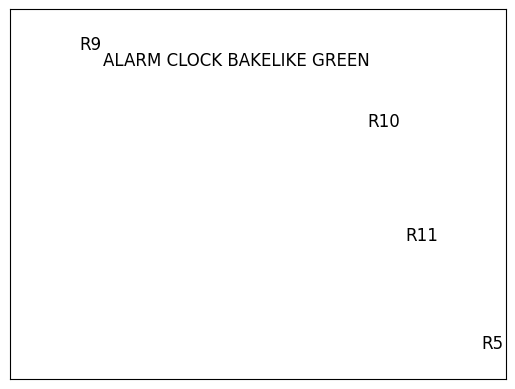

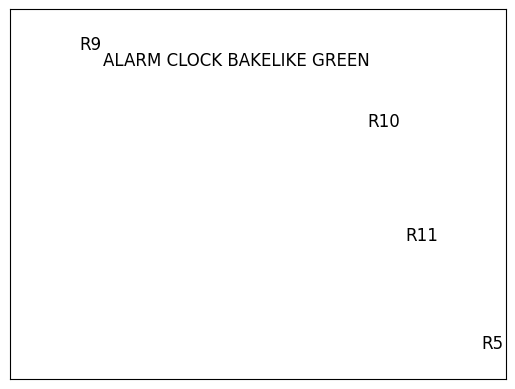

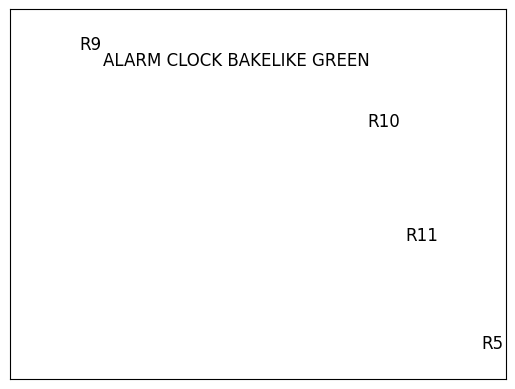

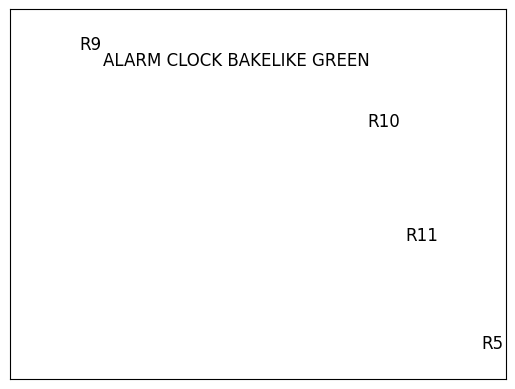

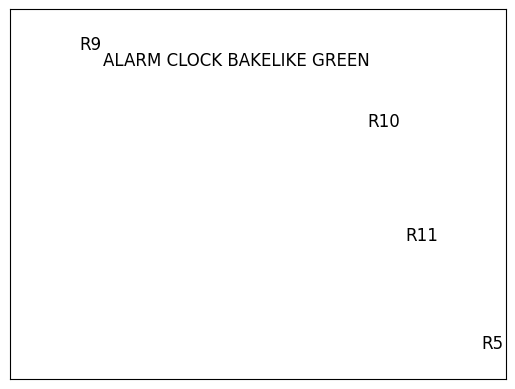

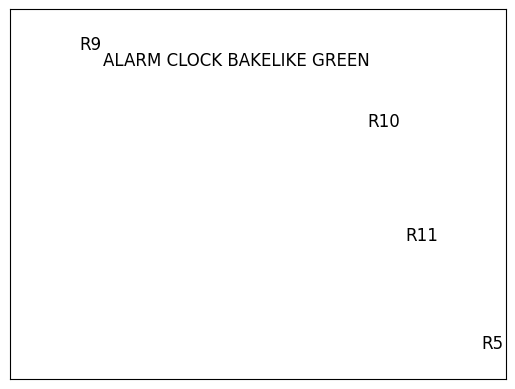

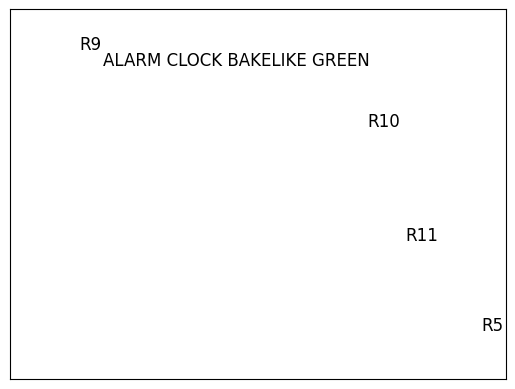

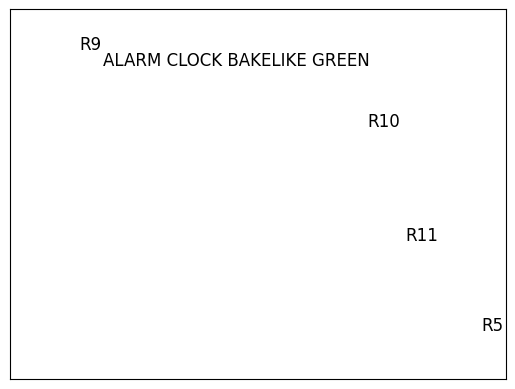

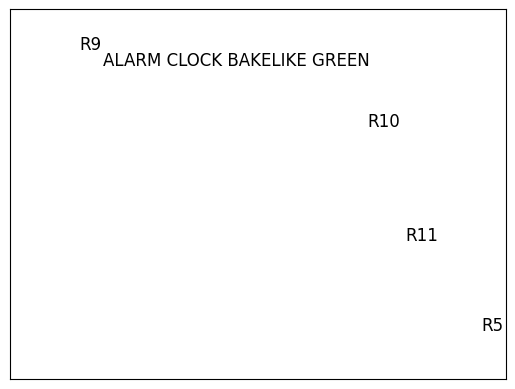

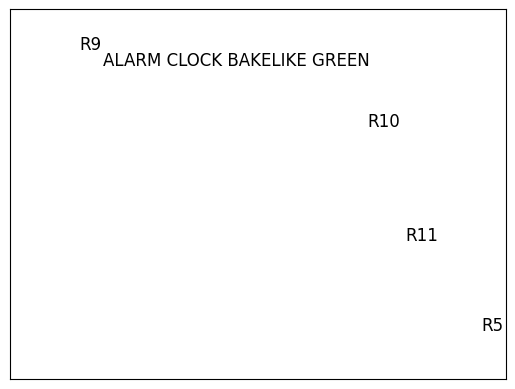

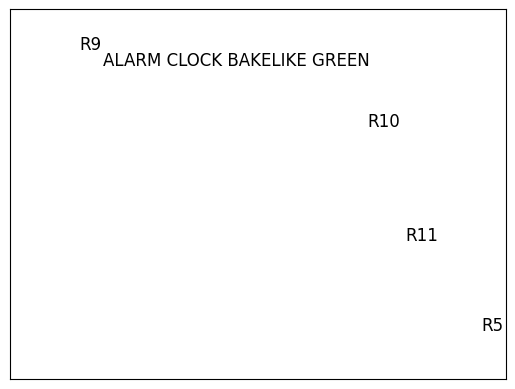

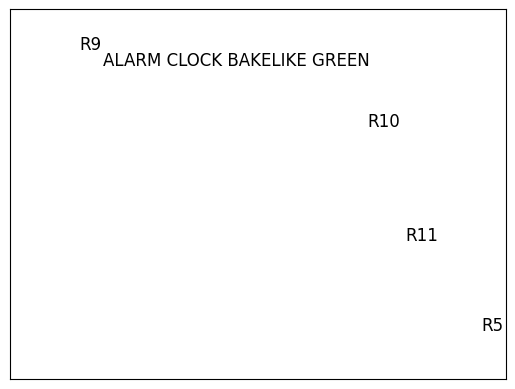

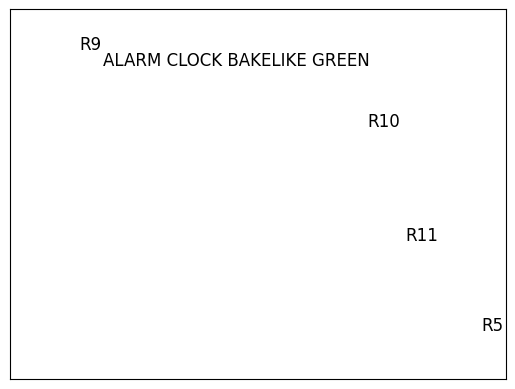

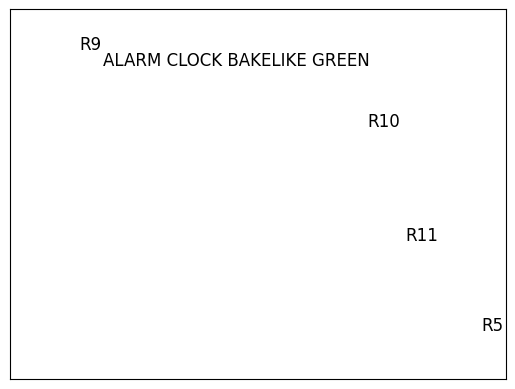

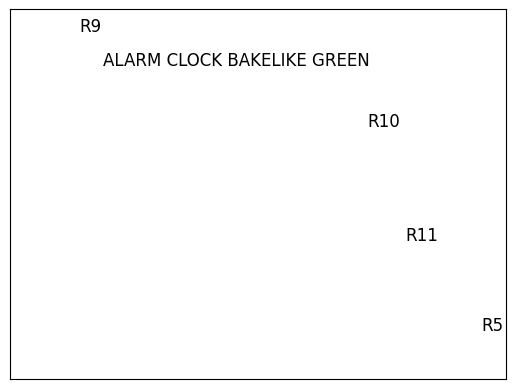

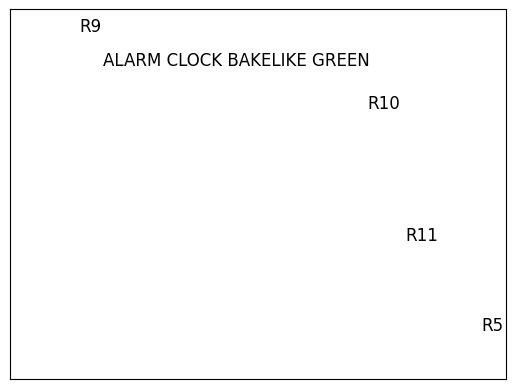

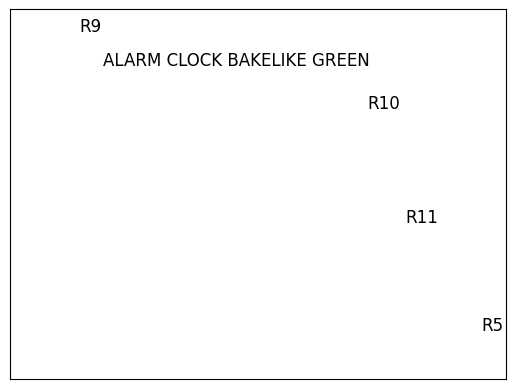

In [94]:
'''
Directed graph below is built for this rule and shown below. it will have always incoming and outcoming edges. 
Incoming edge(s) will represent antecedants and the stub (arrow) will be next to node.
'''

#plotting output in a graph plot.

def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('orange')
        else:
            color_map.append('pink')       

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edgelist=edges, node_color = color_map, edge_color=colors, width=weights, font_size=8,with_labels=False)            

    for p in pos:  # raise text positions
        pos[p][1] += 0.05
        nx.draw_networkx_labels(G1, pos)
        plt.show()

draw_graph (rules_mlxtend, 12)